In [9]:
#importing libraries
import numpy as np
import pandas as pd
import scipy.io as scp
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
# Finds the closest Centroids for matrix X
def findClosestCentroids(X, centroids):
    """ Findest closest centroid for each x coordinate
    
    Args:
        X(Numpy matrix): Design Matrix
        centroids(Numpy matrix): matrix of intial centroids
    
    Returns:
        idx: Numpy vector of assigned centroid clusters(1,2.. K)
    
    """
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0], 1))

    dist = np.zeros((1,K))
    m = X.shape[0]
    for i in range(0,m): 
        for j in range(0,K):
            dist[0,j] = (np.linalg.norm(X[i,:] - centroids[j,:],ord = 2))**2 
  
        closest = np.argmin(dist)
        idx[i] = closest

    return idx




In [2]:
# Computes new centroids 
def computeCentroids(X, idx, K):
    """Computes new centroid values
    
    Args:
        X(numpy matrix): Design Matrix
        idx(numpy vector): Assigned clusters for each row
        K(int): number of clusters
    
    Returns:
        centroids: matrix of new centroid values
        
    
    
    """
    
    (m,n) = X.shape
    
    
    centroids = np.zeros((K, n))

    for i in range(0,K):
        count = np.sum(i == idx)
        z = np.array(idx == i).T[0]
        vecs = X[z]
        sumvecs = np.sum(vecs,axis = 0)
        centroids[i,:] = (1/count)*sumvecs
    return centroids
    


In [26]:
# Kmeans clustering algorithm
def runkmeans(X, initial_centroids, max_iters):
    """Runs Kmeans clustering 
    
    Args:
        X(Numpy matrix): Design Matrix
        intial_centroids(numpy matrix): intitial centroids matrix
        max_iters(int): number of iterations for k-means
        
    Returns:
        (centroids,idx): tuple of the last centroid and assignment for clustering vector
    
    """
    centroids = initial_centroids
    k = initial_centroids.shape[0]
    for i in range(0,max_iters):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, k)
    return (centroids,idx)

In [46]:
data = np.random.randint(50, size=(50,2))
data = np.array(data)

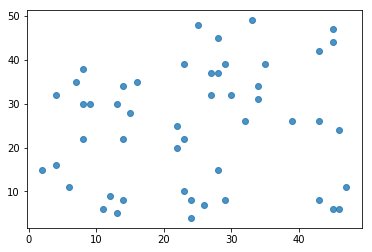

In [47]:
sns.regplot(x=data[:,0], y=data[:,1],fit_reg=False)

In [68]:
centroids = np.random.randint(50, size=(3,2))
max_iters = 50
(centroids,idx) = runkmeans(data,centroids,max_iters)

0
[[0. 0. 0.]]
1
[[0. 0. 0.]]
2
[[0. 0. 0.]]
3
[[0. 0. 0.]]
4
[[0. 0. 0.]]
5
[[0. 0. 0.]]
6
[[0. 0. 0.]]
7
[[0. 0. 0.]]
8
[[0. 0. 0.]]
9
[[0. 0. 0.]]
10
[[0. 0. 0.]]
11
[[0. 0. 0.]]
12
[[0. 0. 0.]]
13
[[0. 0. 0.]]
14
[[0. 0. 0.]]
15
[[0. 0. 0.]]
16
[[0. 0. 0.]]
17
[[0. 0. 0.]]
18
[[0. 0. 0.]]
19
[[0. 0. 0.]]
20
[[0. 0. 0.]]
21
[[0. 0. 0.]]
22
[[0. 0. 0.]]
23
[[0. 0. 0.]]
24
[[0. 0. 0.]]
25
[[0. 0. 0.]]
26
[[0. 0. 0.]]
27
[[0. 0. 0.]]
28
[[0. 0. 0.]]
29
[[0. 0. 0.]]
30
[[0. 0. 0.]]
31
[[0. 0. 0.]]
32
[[0. 0. 0.]]
33
[[0. 0. 0.]]
34
[[0. 0. 0.]]
35
[[0. 0. 0.]]
36
[[0. 0. 0.]]
37
[[0. 0. 0.]]
38
[[0. 0. 0.]]
39
[[0. 0. 0.]]
40
[[0. 0. 0.]]
41
[[0. 0. 0.]]
42
[[0. 0. 0.]]
43
[[0. 0. 0.]]
44
[[0. 0. 0.]]
45
[[0. 0. 0.]]
46
[[0. 0. 0.]]
47
[[0. 0. 0.]]
48
[[0. 0. 0.]]
49
[[0. 0. 0.]]


In [76]:
data2 = np.concatenate((data,idx),axis = 1)
data2

array([[47., 11.,  2.],
       [39., 26.,  0.],
       [34., 31.,  0.],
       [35., 39.,  0.],
       [ 8., 38.,  1.],
       [24.,  4.,  2.],
       [26.,  7.,  2.],
       [ 4., 16.,  1.],
       [45., 44.,  0.],
       [46., 24.,  0.],
       [43., 42.,  0.],
       [34., 34.,  0.],
       [16., 35.,  1.],
       [27., 32.,  0.],
       [ 6., 11.,  1.],
       [22., 25.,  1.],
       [15., 28.,  1.],
       [11.,  6.,  2.],
       [29.,  8.,  2.],
       [22., 20.,  1.],
       [ 7., 35.,  1.],
       [27., 37.,  0.],
       [ 8., 30.,  1.],
       [14.,  8.,  2.],
       [46.,  6.,  2.],
       [25., 48.,  0.],
       [28., 37.,  0.],
       [23., 22.,  1.],
       [43.,  8.,  2.],
       [32., 26.,  0.],
       [29., 39.,  0.],
       [23., 10.,  2.],
       [ 2., 15.,  1.],
       [24.,  8.,  2.],
       [45.,  6.,  2.],
       [13., 30.,  1.],
       [43., 26.,  0.],
       [14., 34.,  1.],
       [23., 39.,  0.],
       [12.,  9.,  2.],
       [ 8., 22.,  1.],
       [28., 45.

In [78]:
df = pd.DataFrame({"X":data2[:,0],"Y":data2[:,1],"label":data2[:,2]})
df

,X,Y,label
0,47.0,11.0,2.0
1,39.0,26.0,0.0
2,34.0,31.0,0.0
3,35.0,39.0,0.0
4,8.0,38.0,1.0
5,24.0,4.0,2.0
6,26.0,7.0,2.0
7,4.0,16.0,1.0
8,45.0,44.0,0.0
9,46.0,24.0,0.0


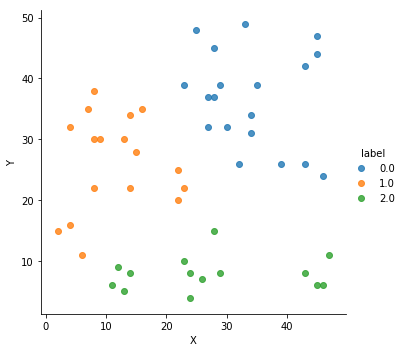

In [82]:
sns.lmplot(x="X", y="Y",data = df,hue="label",fit_reg=False)